Saving test_1.jpg to test_1 (1).jpg
[2024/09/16 17:26:20] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_ba

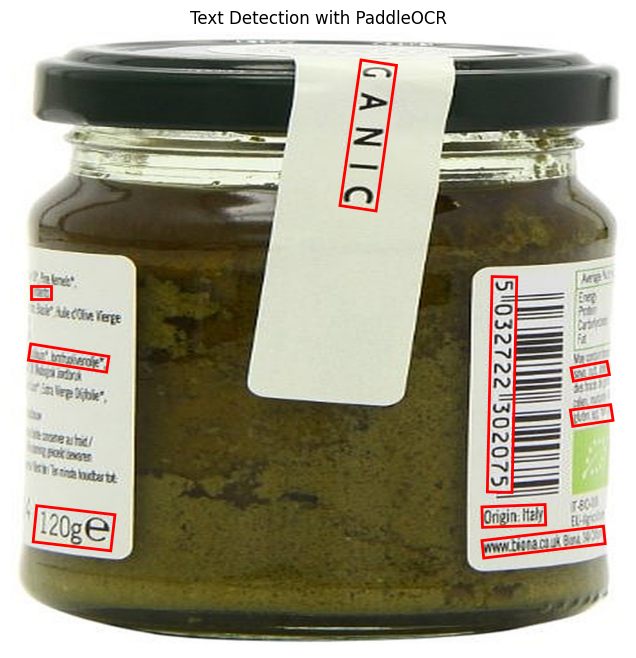

In [ ]:
#Paddle OCR

!pip install paddlepaddle
!pip install paddleocr
!pip install opencv-python-headless
!pip install matplotlib
from google.colab import files

uploaded = files.upload()

import cv2
import numpy as np
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
from paddleocr import PaddleOCR, draw_ocr
import matplotlib.patches as patches


image_path = list(uploaded.keys())[0]
image = cv2.imdecode(np.frombuffer(uploaded[image_path], np.uint8), cv2.IMREAD_COLOR)


def enhance_image(image_np, scale_factor=2.0, sharpness_factor=2.0, output_size=(1024, 1024)):

    pil_image = Image.fromarray(cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB))

    enhancer = ImageEnhance.Sharpness(pil_image)
    enhanced_image = enhancer.enhance(sharpness_factor)


    new_size = (int(pil_image.width * scale_factor), int(pil_image.height * scale_factor))
    resized_image = enhanced_image.resize(new_size, Image.Resampling.LANCZOS)


    image_cv = cv2.cvtColor(np.array(resized_image), cv2.COLOR_RGB2BGR)


    final_image = cv2.resize(image_cv, output_size, interpolation=cv2.INTER_CUBIC)

    return final_image


def detect_text_from_image(image):

    if not isinstance(image, np.ndarray):
        raise ValueError("Input must be a NumPy array")


    ocr = PaddleOCR(use_angle_cls=True, lang='en')


    results = ocr.ocr(image)


    for line in results[0]:
        print(f"Detected text: {line[1][0]} (Confidence: {line[1][1]:.2f})")


    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


    fig, ax = plt.subplots(1, figsize=(12, 8))
    ax.imshow(image_rgb)

    for line in results[0]:
        bbox, text, prob = line[0], line[1][0], line[1][1]


        bbox = np.array(bbox, dtype=np.int32)

        bbox = np.vstack((bbox, bbox[0]))


        rect = patches.Polygon(bbox, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)


    ax.axis('off')
    plt.title("Text Detection with PaddleOCR")
    plt.show()


if image is None:
    raise ValueError("Image not loaded. Please check the file path.")


enhanced_image = enhance_image(image)


detect_text_from_image(enhanced_image)
